# Load, threshold and save an image

> In this tutorial you will learn how to load a medical image with **MedPy**, how to perform a simple thresholding operation and how to save the resulting binary image. 

Loading an image with **MedPy** is straight-forward. Assuming you have the [required third party libraries](http://loli.github.io/medpy/information/imageformats.html) installed, the [load](http://loli.github.io/medpy/generated/medpy.io.load.load.html) function is all you need. It returns the image as an array and the associated header with meta-data.

In [1]:
from medpy.io import load

i, h = load("flair.nii.gz")

print(i.shape, i.dtype)

(181, 217) float32


The image's data type (here: float) is automatically determined and the correct numpy array created. Now let's take a look at the image using the jupyter notebooks inline magic.

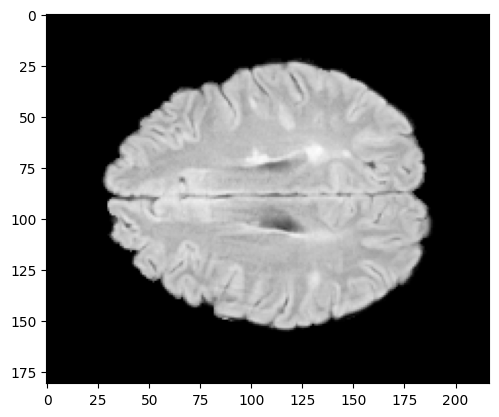

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(i, cmap = cm.Greys_r)

We can see a slice of a 3D MRI Flair volume. The experienced user might even spot some perventricular MS lesions, but these are not of our concern right now.

What we would like to do is to separate the image from the background via a simple thresholding operation. Let's take a look at the image's histogram to determine the values of the background voxels.

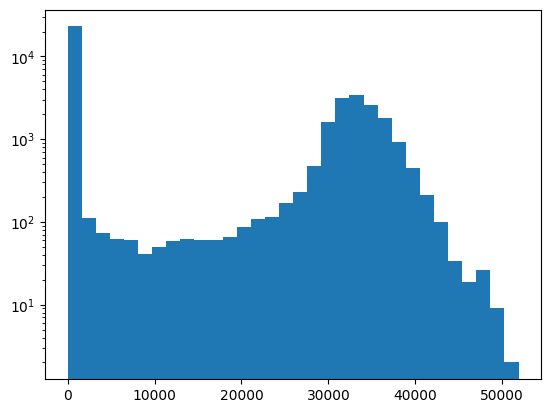

In [3]:
plt.hist(i.ravel(), bins=32, log=True);

A clear peak (consider the log-scale) at the 0-values hints towards a 0-valued background. We can further conform this by computing the mean value over a small recantgular reagion in the upper-left image corner.

In [4]:
bgmean = i[:10,:10].mean()
print(bgmean)

0.0


Most likely, the image's background is uniformly 0-valued. We can now extract a brain mask and display it.

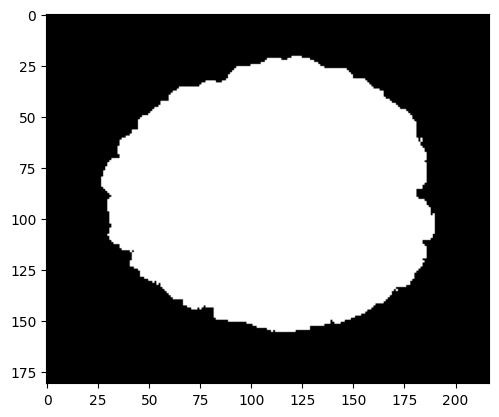

In [5]:
brainmask = i > bgmean

plt.imshow(brainmask, cmap = cm.Greys_r)

Comparing this binary image with the original image above, we can say that we obtained a good brain mask.

Now to saving the mask with **MedPy**'s [save](http://loli.github.io/medpy/generated/medpy.io.save.save.html) function. It takes a numpy array, a filename and an optional header file. The desired image type is automatically determined from the file ending and the apropriate image writer used. All relevant meta-data from the header, such as the voxel-spacing, is transfered.

In [6]:
from medpy.io import save

save(brainmask, "brainmask.nii.gz", hdr=h, force=True)

Comparing our brainmask array before the saving with the re-loaded array comes with two surprises.

In [7]:
print("Before:", brainmask.shape, brainmask.dtype)

brainmask, brainmask_h = load("brainmask.nii.gz")

print("After:", brainmask.shape, brainmask.dtype)

Before: (181, 217) bool
After: (181, 217) uint8


*First*, the array's datatype has changed. This is caused by the chosen image format, NIfTI, which [does not support the boolean type](http://nifti.nimh.nih.gov/nifti-1/documentation/faq#Q12 "Data types supported by NIfTI"). **MedPy** automatically choses the next largest compatible data type, if one such is available. Otherwise an exception is thrown.

Did you spot the *second* surprise? We used the header from the original image, which was of data type float. Nevertheless the new image was save as uint8. How come? **MedPy** treats the information contained in the numpy array as superordinate to the header's, i.e., in the case of discrepancies, the arrays information is given prevalance and the header adapted accordingly.

Now you know how to load and save image with **MedPy**. Why not [take a look which image formats your current configuration supports](https://loli.github.io/medpy/information/imageformats.html) and try a few in-between-formats and in-between-data-types conversions with your own images to get a feeling for the process. Then continue, e.g, with our tutorial on [simple binary image processing](02_simple_binary_image_processing.ipynb).